In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, expon, t, chi2, uniform, binom, poisson
from sklearn.linear_model import LinearRegression
from datetime import datetime

plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('../Styles/stylesheet.mplstyle') 

In [4]:
# Lineaire regressie

# Lineaire regressie

\begin{center}
    \begin{tabular}{c|cccccccccc}
        \toprule
            \textbf{$X$} & $30$ & $50$ & $70$ & $90$ & $110$ & $130$ & $150$ & $170$ & $190$ & $210$ \\
            \textbf{$Y$} & $3.9$ & $3.5$ & $2.7$ & $6.1$ & $4.4$ & $5.6$ & $6.3$ & $4.4$ & $8.1$ & $7.5$ \\
        \bottomrule
    \end{tabular}
\end{center}


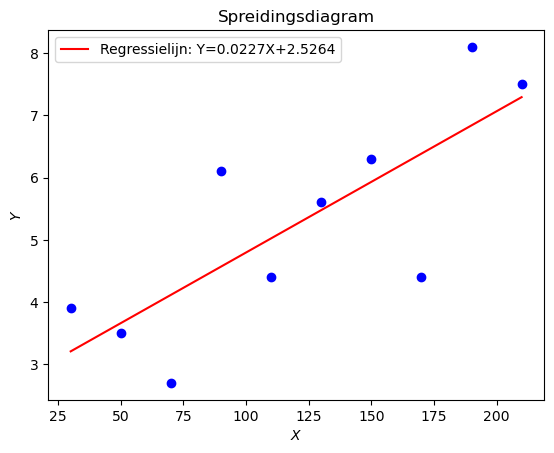

\begin{center}
\begin{tabular}{ccccc}
\toprule
$X$ & $Y$ & $XY$ & $X^2$ & $Y^2$ \\
\midrule
$30$ & $3.9$ & $117.0$ & $900$ & $15.209999999999999$ \\
$50$ & $3.5$ & $175.0$ & $2500$ & $12.25$ \\
$70$ & $2.7$ & $189.0$ & $4900$ & $7.290000000000001$ \\
$90$ & $6.1$ & $549.0$ & $8100$ & $37.209999999999994$ \\
$110$ & $4.4$ & $484.00000000000006$ & $12100$ & $19.360000000000003$ \\
$130$ & $5.6$ & $728.0$ & $16900$ & $31.359999999999996$ \\
$150$ & $6.3$ & $945.0$ & $22500$ & $39.69$ \\
$170$ & $4.4$ & $748.0000000000001$ & $28900$ & $19.360000000000003$ \\
$190$ & $8.1$ & $1539.0$ & $36100$ & $65.61$ \\
$210$ & $7.5$ & $1575.0$ & $44100$ & $56.25$ \\
\midrule
$\overline{X} = 120.0000$ & $\overline{Y} = 5.2500$ & $\overline{XY} = 704.9000$ & $\overline{X^2} = 17700.0000$ & $\overline{Y^2} = 30.3590$ \\
\bottomrule
\end{tabular}

\begin{align*}
r &= \frac{\overline{X \cdot Y} - \overline{X} \cdot \overline{Y}}{\sqrt{(\overline{X}^2 - \overline{X^2}) \cdot (\overline{Y}^2 - \overline{Y^2})}

In [10]:
def plot_linear_regression(X, Y):
    # Convert lists to numpy arrays

    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y)

    # Calculate linear regression parameters
    model = LinearRegression()
    model.fit(X, Y)
    m = model.coef_[0] # slope
    b = model.intercept_ # intercept

    # Get the predictions
    Y_pred = model.predict(X)

    # Create scatter plot
    plt.scatter(X, Y, color='blue')
    
    # Plot regression line
    if b > 0:
        plt.plot(X, m * X + b, color='red', label=f"Regressielijn: Y={m:.4f}X+{b:.4f}")
    else:
        plt.plot(X, m * X + b, color='red', label=f"Regressielijn: Y={m:.4f}X{b:.4f}")

    # Label axes and add title
    plt.xlabel('$X$')
    plt.ylabel('$Y$')
    plt.title('Spreidingsdiagram')
    plt.legend()
    
    # Show plot
    plt.show()

def generate_latex_table(X, Y):
    # Start building the LaTeX table
    latex_code = (
        "\\begin{center}\n"
        "    \\begin{tabular}{c|cccccccccc}\n"
        "        \\toprule\n"
        "            \\textbf{$X$} & $" + "$ & $".join(map(str, X)) + "$ \\\\\n"
        "            \\textbf{$Y$} & $" + "$ & $".join(map(str, Y)) + "$ \\\\\n"
        "        \\bottomrule\n"
        "    \\end{tabular}\n"
        "\\end{center}"
    )
    
    return latex_code


def generate_latex_table_regression(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    
    # Compute XY, X^2, and Y^2
    XY = X * Y
    X_squared = X ** 2
    Y_squared = Y ** 2
    
    # Start building the LaTeX table
    latex_code = (
        "\\begin{center}\n"
        "\\begin{tabular}{ccccc}\n"
        "\\toprule\n"
        "$X$ & $Y$ & $XY$ & $X^2$ & $Y^2$ \\\\\n"
        "\\midrule\n"
    )
    
    # Populate table rows
    for x, y, xy, x2, y2 in zip(X, Y, XY, X_squared, Y_squared):
        latex_code += f"${x}$ & ${y}$ & ${xy}$ & ${x2}$ & ${y2}$ \\\\\n"
    
    # Add final row with averages
    # Compute averages
    avg_X = np.mean(X)
    avg_Y = np.mean(Y)
    avg_XY = np.mean(XY)
    avg_X_squared = np.mean(X_squared)
    avg_Y_squared = np.mean(Y_squared)

    latex_code += (
        "\\midrule\n"
        f"$\\overline{{X}} = {avg_X:.4f}$ & "
        f"$\\overline{{Y}} = {avg_Y:.4f}$ & "
        f"$\\overline{{XY}} = {avg_XY:.4f}$ & "
        f"$\\overline{{X^2}} = {avg_X_squared:.4f}$ & "
        f"$\\overline{{Y^2}} = {avg_Y_squared:.4f}$ \\\\\n"
        "\\bottomrule\n"
        "\\end{tabular}\n"
    )

    
    return latex_code

def pearson_correlation_latex(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    
    # Compute necessary statistical values
    avg_X = np.mean(X)
    avg_Y = np.mean(Y)
    avg_XY = np.mean(X * Y)
    avg_X_squared = np.mean(X ** 2)
    avg_Y_squared = np.mean(Y ** 2)
    
    # Compute Pearson correlation coefficient
    numerator = avg_XY - (avg_X * avg_Y)
    denominator = np.sqrt((avg_X**2 - avg_X_squared) * (avg_Y**2 - avg_Y_squared))
    r = numerator / denominator
    
    # Generate LaTeX output
    latex_code = (
        "\\begin{align*}\n"
        "r &= \\frac{\\overline{X \\cdot Y} - \\overline{X} \\cdot \\overline{Y}}{\\sqrt{(\\overline{X}^2 - \\overline{X^2}) \\cdot (\\overline{Y}^2 - \\overline{Y^2})}} \\\\\n"
        f"&= \\frac{{{avg_XY:.3f} - {avg_X:.3f} \\cdot {avg_Y:.3f}}}{{\\sqrt{{({avg_X:.3f}^2 - {avg_X_squared:.3f}) \\cdot ({avg_Y:.3f}^{2} - {avg_Y_squared:.3f})}}}} \\\\\n"
        f"&= \\frac{{{numerator:.3f}}}{{{denominator:.3f}}} \\\\\n"
        f"&\\approx {r:.4f}.\n"
        "\\end{align*}"
    )
    
    return latex_code


X = [30, 50, 70, 90, 110, 130, 150, 170, 190, 210]
Y = [3.9, 3.5, 2.7, 6.1, 4.4, 5.6, 6.3, 4.4, 8.1, 7.5]
# generate latex table for the question itself
latex_table = generate_latex_table(X, Y)
print(latex_table)

plot_linear_regression(X, Y)
regression_table = generate_latex_table_regression(X, Y)
print(regression_table)
pearson = pearson_correlation_latex(X, Y)
print(pearson)

# CHIKWADRAAT

In [6]:
import numpy as np
from scipy.stats import chisquare, poisson

# Geobserveerde waarden
observed = np.array([40, 80, 100, 85, 35, 15, 10])

# Verwachte waarden
expected = np.array([365 * poisson.pmf(k, 813/365) for k in range(6)] + [365 * (1 - poisson.cdf(5, 813/365))])
print(expected)

# Chi-kwadraat toetsingsgrootheid berekenen
chi2_stat, p_value = chisquare(observed, expected)

print(f"Chi-kwadraat toetsingsgrootheid: {chi2_stat:.4f}")
print(f"P-waarde: {p_value:.4f}")


[39.35016206 87.64844317 97.61395109 72.47501574 40.35766287 17.97850954
  9.57625553]
Chi-kwadraat toetsingsgrootheid: 4.1245
P-waarde: 0.6598


In [1]:
import numpy as np
import scipy.stats as stats

def betrouwbaarheidsinterval(sample_mean, sample_std, n, confidence=0.95):
    """Bereken het betrouwbaarheidsinterval voor een gegeven dataset."""
    t_waarde = stats.t.ppf((1 + confidence) / 2, df=n-1)
    marge_fout = t_waarde * (sample_std / np.sqrt(n))
    return round(sample_mean - marge_fout), round(sample_mean + marge_fout)

def hypothesetoets(sample_mean, pop_mean, sample_std, n, alpha=0.02):
    """Voer een eenzijdige t-toets uit en geef terug of H0 verworpen moet worden."""
    t_stat = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))
    kritieke_t = stats.t.ppf(alpha, df=n-1)  # Eenzijdig, linkse grens
    return t_stat < kritieke_t, t_stat

def recordbreking(team_size, sample_mean, sample_std, alpha=0.05):
    """Bereken de waarde x waarvoor de kans op recordbreking 5% is."""
    team_mean = team_size * sample_mean
    team_std = np.sqrt(team_size) * sample_std
    kritieke_x = team_mean - stats.norm.ppf(alpha) * team_std
    return round(kritieke_x)

# Gegeven waarden
sample_mean = 390  # ms
sample_std = 40  # ms
n = 18
pop_mean = 420  # ms
team_size = 6

# Uitvoeren van de berekeningen
bi_low, bi_high = betrouwbaarheidsinterval(sample_mean, sample_std, n)
reject_H0, t_stat = hypothesetoets(sample_mean, pop_mean, sample_std, n)
record_x = recordbreking(team_size, sample_mean, sample_std)

# Resultaten tonen
print(f"95%-Betrouwbaarheidsinterval: ({bi_low}, {bi_high}) ms")
print(f"Hypothesetoets: T-statistiek = {t_stat:.2f}, Verwerp H0? {'Ja' if reject_H0 else 'Nee'}")
print(f"Waarde voor recordbreking bij 5% kans: {record_x} ms")

95%-Betrouwbaarheidsinterval: (370, 410) ms
Hypothesetoets: T-statistiek = -3.18, Verwerp H0? Ja
Waarde voor recordbreking bij 5% kans: 2501 ms
